## Challenge Set 5  
Linear Splitting  
Malik Salam  
01/22 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import pickle
import patsy
sns.set()
%matplotlib inline

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Challenge 1

In [3]:
with open("df_master_copy.pkl", 'rb') as picklefile: 
    df_master = pickle.load(picklefile)
df_master.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi,writer_cum_oscar_noms,writer_cum_oscars,writer_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,2.00038,0.0,0.0,0.887892,5.333333,1.666667,-0.052432,0.0,0.0,0.169079
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,NaN,0.0,0.0,NaN,1.000000,0.000000,NaN,0.0,0.0,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN


In [4]:
df_c1 = df_master[['dom_gross']].dropna()
df_c1['constant'] = 1
df_c1.head()

,dom_gross,constant
0,77222099.0,1
1,4264983.0,1
2,930211.0,1
3,40716963.0,1
4,1031.0,1


In [5]:
X_c1 = df_c1[['constant']]
y_c1 = df_c1[['dom_gross']]

# fit model
lr_c1 = LinearRegression()
lr_c1.fit(X_c1, y_c1)
lr_c1.score(X_c1, y_c1)

0.0

In [6]:
print("Intercept:", lr_c1.intercept_[0])
print("Coefficient:", lr_c1.coef_[0][0])
print("Mean of y:", float(y_c1.mean()))

Intercept: 17877106.7541
Coefficient: 0.0
Mean of y: 17877106.754128553


Essentially, this is a flat line at the target variable's mean. This gives us an R2 of 0 which makes sense since, in this case RSS = TSS therefore R2 is 0.

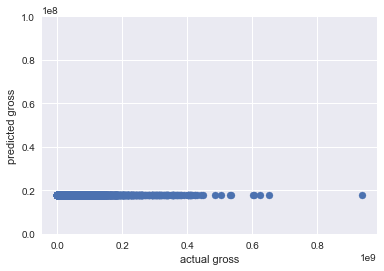

In [7]:
# plot predictions vs actuals
df_c1['predictions'] = lr_c1.predict(X_c1)

plt.scatter(df_c1['dom_gross'], df_c1['predictions'])
plt.ylim(0, 1e8)
plt.xlabel('actual gross')
plt.ylabel('predicted gross');

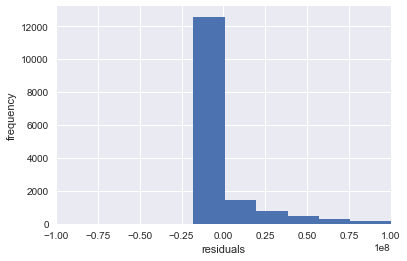

In [8]:
# make a histogram of residuals
df_c1['resids'] = df_c1['dom_gross'] - df_c1['predictions']
plt.hist(df_c1['resids'], bins=50)
plt.xlim(-1e8, 1e8)
plt.xlabel('residuals')
plt.ylabel('frequency');

In [9]:
# residuals look to be mostly close to zero and skewed towards positive values

## Challenge 2

In [10]:
df_c2 = df_master[['dom_gross', 'final_budget']].dropna()
df_c2.head()

,dom_gross,final_budget
0,77222099.0,110000000.0
6,37519139.0,67500000.0
11,288751.0,1300000.0
13,15322921.0,12000000.0
14,65016287.0,30000000.0


In [11]:
X_c2 = df_c2[['final_budget']]
y_c2 = df_c2[['dom_gross']]

# fit model
lr_c2 = LinearRegression()
lr_c2.fit(X_c2, y_c2)
lr_c2.score(X_c2, y_c2)

0.43846194504499469

In [12]:
print("Intercept:", lr_c2.intercept_[0])
print("Coefficient:", lr_c2.coef_[0][0])

Intercept: 10898143.6482
Coefficient: 1.03345592705


In [13]:
# looks like, in general $1 extra in budget yields $1.03 in domestic gross

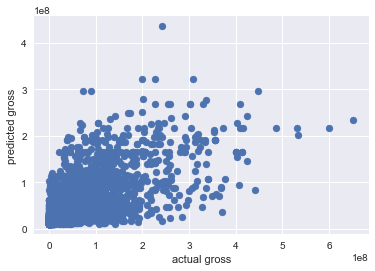

In [14]:
# plot predictions vs target actuals
df_c2['predictions'] = lr_c2.predict(X_c2)

plt.scatter(df_c2['dom_gross'], df_c2['predictions'])
plt.xlabel('actual gross')
plt.ylabel('predicted gross');

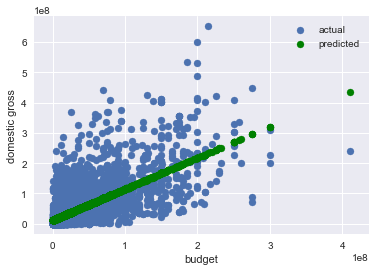

In [15]:
# plot model prediction against your feature variable
plt.scatter(df_c2['final_budget'], df_c2['dom_gross'], label='actual')
plt.scatter(df_c2['final_budget'], df_c2['predictions'], c='g', label='predicted')
plt.xlabel('budget')
plt.ylabel('domestic gross')
plt.legend();

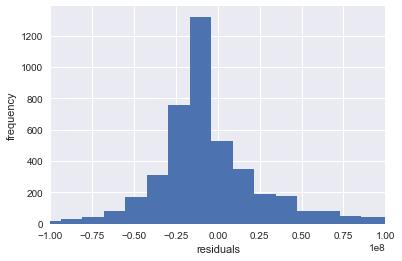

In [16]:
# make a histogram of residuals
df_c2['resids'] = df_c2['dom_gross'] - df_c2['predictions']
plt.hist(df_c2['resids'], bins=50)
plt.xlim(-1e8, 1e8)
plt.xlabel('residuals')
plt.ylabel('frequency');

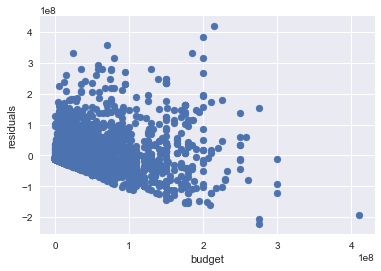

In [17]:
# plot residuals on feature variable
plt.scatter(df_c2['final_budget'], df_c2['resids'])
plt.xlabel('budget')
plt.ylabel('residuals');

Text(0,0.5,'residuals')

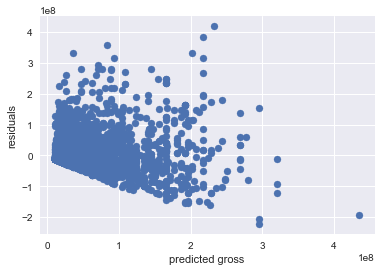

In [18]:
# plot residuals on predictions
plt.scatter(df_c2['predictions'], df_c2['resids'])
plt.xlabel('predicted gross')
plt.ylabel('residuals')

In [19]:
# plots look very similar given the almost one to one relationship between budget and gross

## Challenge 3

In [49]:
df_c3 = df_master[['dom_gross', 'final_budget', 'mpaa_rating']].dropna()
df_c3.head()

,dom_gross,final_budget,mpaa_rating
0,77222099.0,110000000.0,PG-13
6,37519139.0,67500000.0,R
11,288751.0,1300000.0,Unrated
13,15322921.0,12000000.0,R
14,65016287.0,30000000.0,R


In [50]:
# append dummy matrix
df_dummies = patsy.dmatrix('mpaa_rating', data=df_c3, return_type='dataframe')
df_c3 = df_c3.join(df_dummies.iloc[:,1:]).drop('mpaa_rating', axis=1)
df_c3.head()

,dom_gross,final_budget,mpaa_rating[T.GP],mpaa_rating[T.M],mpaa_rating[T.M/PG],mpaa_rating[T.NC-17],mpaa_rating[T.PG],mpaa_rating[T.PG-13],mpaa_rating[T.R],mpaa_rating[T.Unrated]
0,77222099.0,110000000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,37519139.0,67500000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,288751.0,1300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,15322921.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,65016287.0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_c3 = df_c3.iloc[:, 1:]
y_c3 = df_c3[['dom_gross']]

# fit model
lr_c3 = LinearRegression()
lr_c3.fit(X_c3, y_c3)
lr_c3.score(X_c3, y_c3)

0.45042391537567761

In [52]:
pd.DataFrame(lr_c3.coef_[0], index=X_c3.columns, columns=['Coefficients'])

,Coefficients
final_budget,9.895593e-01
mpaa_rating[T.GP],1.475349e+07
mpaa_rating[T.M],-3.999143e+06
mpaa_rating[T.M/PG],-2.257417e+07
mpaa_rating[T.NC-17],-4.307556e+07
mpaa_rating[T.PG],-1.426955e+07
mpaa_rating[T.PG-13],-2.321442e+07
mpaa_rating[T.R],-3.003270e+07
mpaa_rating[T.Unrated],-3.911742e+07


In [53]:
# it looks like the only rating that is associated with a positive outcome is 'GP'
# an NC-17 rating looks like a death blow to a movie

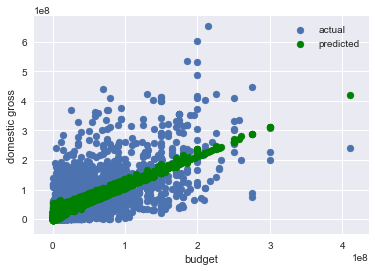

In [54]:
# plot predicted values and budget
df_c3['predictions'] = lr_c3.predict(X_c3)
plt.scatter(df_c3['final_budget'], df_c3['dom_gross'], label='actual')
plt.scatter(df_c3['final_budget'], df_c3['predictions'], c='g', label='predicted')
plt.xlabel('budget')
plt.ylabel('domestic gross')
plt.legend();

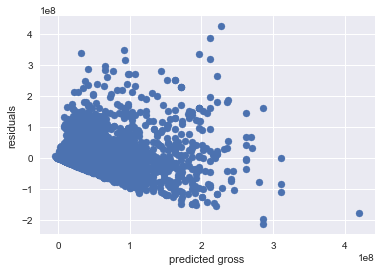

In [55]:
# plot resudials on predicted values
df_c3['resids'] = df_c3['dom_gross'] - df_c3['predictions']
plt.scatter(df_c3['predictions'], df_c3['resids'])
plt.xlabel('predicted gross')
plt.ylabel('residuals');

In [56]:
# still looks similar and fairly bad.

## Challenge 4

In [57]:
df_c4 = df_master[['dom_gross', 'title', 'genre',\
                   'opening_release', 'opening_we_gross',\
                   'runtime', 'imdb_rating', 'final_budget',\
                   'actor_cum_oscar_noms', 'actor_cum_oscars', \
                   'actor_cum_dom_roi', 'director_cum_oscar_noms',\
                   'director_cum_oscars', 'director_cum_dom_roi',\
                   'producer_cum_oscar_noms', 'producer_cum_oscars',\
                   'producer_cum_dom_roi', 'writer_cum_oscar_noms',\
                   'writer_cum_oscars', 'writer_cum_dom_roi']].dropna()

In [58]:
# append dummy matrix
df_genres = patsy.dmatrix('genre', data=df_c4, return_type='dataframe')
df_c4 = df_c4.join(df_genres.iloc[:,1:]).drop('genre', axis=1)
df_c4 = df_c4.join(df_dummies.iloc[:,1:])
df_c4.head()

,dom_gross,title,opening_release,opening_we_gross,runtime,imdb_rating,final_budget,actor_cum_oscar_noms,actor_cum_oscars,actor_cum_dom_roi,...,genre[T.Western],genre[T.Western Comedy],mpaa_rating[T.GP],mpaa_rating[T.M],mpaa_rating[T.M/PG],mpaa_rating[T.NC-17],mpaa_rating[T.PG],mpaa_rating[T.PG-13],mpaa_rating[T.R],mpaa_rating[T.Unrated]
0,77222099.0,The A-Team,3535.0,25669455.0,117.0,6.8,110000000.0,18.333333,3.333333,2.000380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,37519139.0,Abraham Lincoln: Vampire Hunter,3108.0,16306974.0,105.0,5.9,67500000.0,8.666667,4.000000,0.135612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,65016287.0,About Schmidt,6.0,282367.0,124.0,7.2,30000000.0,39.000000,12.500000,1.589226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22,41385278.0,About a Boy,1207.0,8557630.0,100.0,7.1,27000000.0,10.333333,1.333333,1.166435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,28331233.0,After the Sunset,2819.0,11100392.0,98.0,6.3,57000000.0,7.000000,2.333333,0.187141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X_c4 = df_c4.iloc[:, 2:]
y_c4 = df_c4[['dom_gross']]

# fit model
lr_c4 = LinearRegression()
lr_c4.fit(X_c4, y_c4)
lr_c4.score(X_c4, y_c4)

0.87533285122889315

In [60]:
pd.DataFrame(lr_c4.coef_[0], index=X_c4.columns, columns=['Coefficients'])

,Coefficients
opening_release,-7.177850e+03
opening_we_gross,2.907911e+00
runtime,3.674758e+05
imdb_rating,8.670552e+06
final_budget,-1.202438e-02
actor_cum_oscar_noms,8.701973e+03
actor_cum_oscars,-1.402870e+06
actor_cum_dom_roi,8.617249e+05
director_cum_oscar_noms,2.426008e+05
director_cum_oscars,5.747688e+05


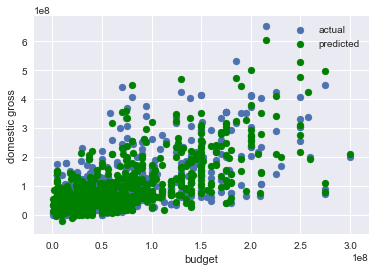

In [62]:
df_c4['predictions'] = lr_c4.predict(X_c4)
plt.scatter(df_c4['final_budget'], df_c4['dom_gross'], label='actual')
plt.scatter(df_c4['final_budget'], df_c4['predictions'], c='g', label='predicted')
plt.xlabel('budget')
plt.ylabel('domestic gross')
plt.legend();

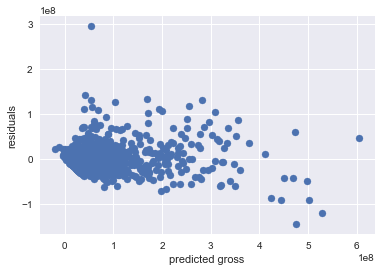

In [63]:
# plot resudials on predicted values
df_c4['resids'] = df_c4['dom_gross'] - df_c4['predictions']
plt.scatter(df_c4['predictions'], df_c4['resids'])
plt.xlabel('predicted gross')
plt.ylabel('residuals');

In [64]:
# this looks better although not perfectly normal.

## Challenge 5

In [69]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_c4, y_c4, test_size= 0.25)
# fit the model on training data
lr_c5 = LinearRegression()
lr_c5.fit(X_train, y_train)
print("Train R2:", lr_c5.score(X_train, y_train))
print("Test R2:", lr_c5.score(X_test, y_test))

Train R2: 0.879388804454
Test R2: 0.84036246809


Looks pretty good

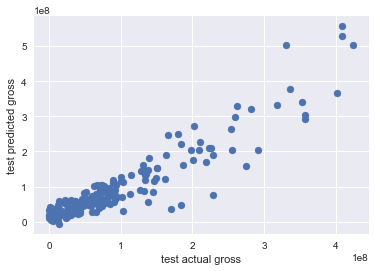

In [83]:
#plot predictes on test actual
test_predict = lr_c5.predict(X_test)
plt.scatter(y_test['dom_gross'], test_predict)
plt.xlabel('test actual gross')
plt.ylabel('test predicted gross');

Also, not too bad!